In [1]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Train data

In [2]:
# read train data

df = pd.read_csv('/kaggle/input/aviachipta-narxini-bashorat-qilish/train_data.csv', index_col='id')
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [3]:
df.info()    # has not null value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           20000 non-null  object 
 1   flight            20000 non-null  object 
 2   source_city       20000 non-null  object 
 3   departure_time    20000 non-null  object 
 4   stops             20000 non-null  object 
 5   arrival_time      20000 non-null  object 
 6   destination_city  20000 non-null  object 
 7   class             20000 non-null  object 
 8   duration          20000 non-null  float64
 9   days_left         20000 non-null  int64  
 10  price             20000 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.8+ MB


In [4]:
# delete flight column

df.drop('flight', axis=1, inplace=True)

# Visualization

<Figure size 1440x1440 with 0 Axes>

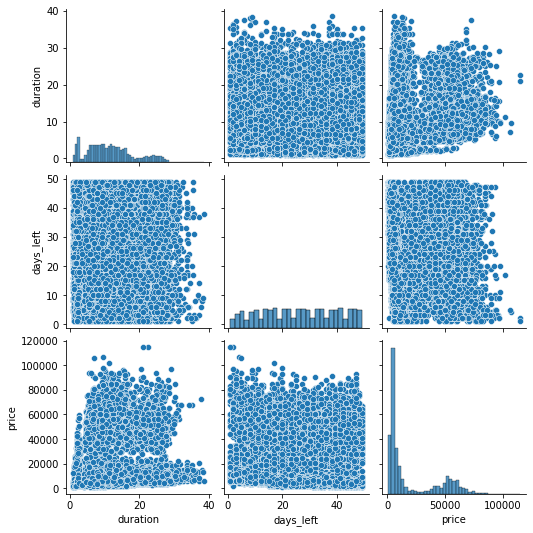

In [5]:
# Compare

plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.show()

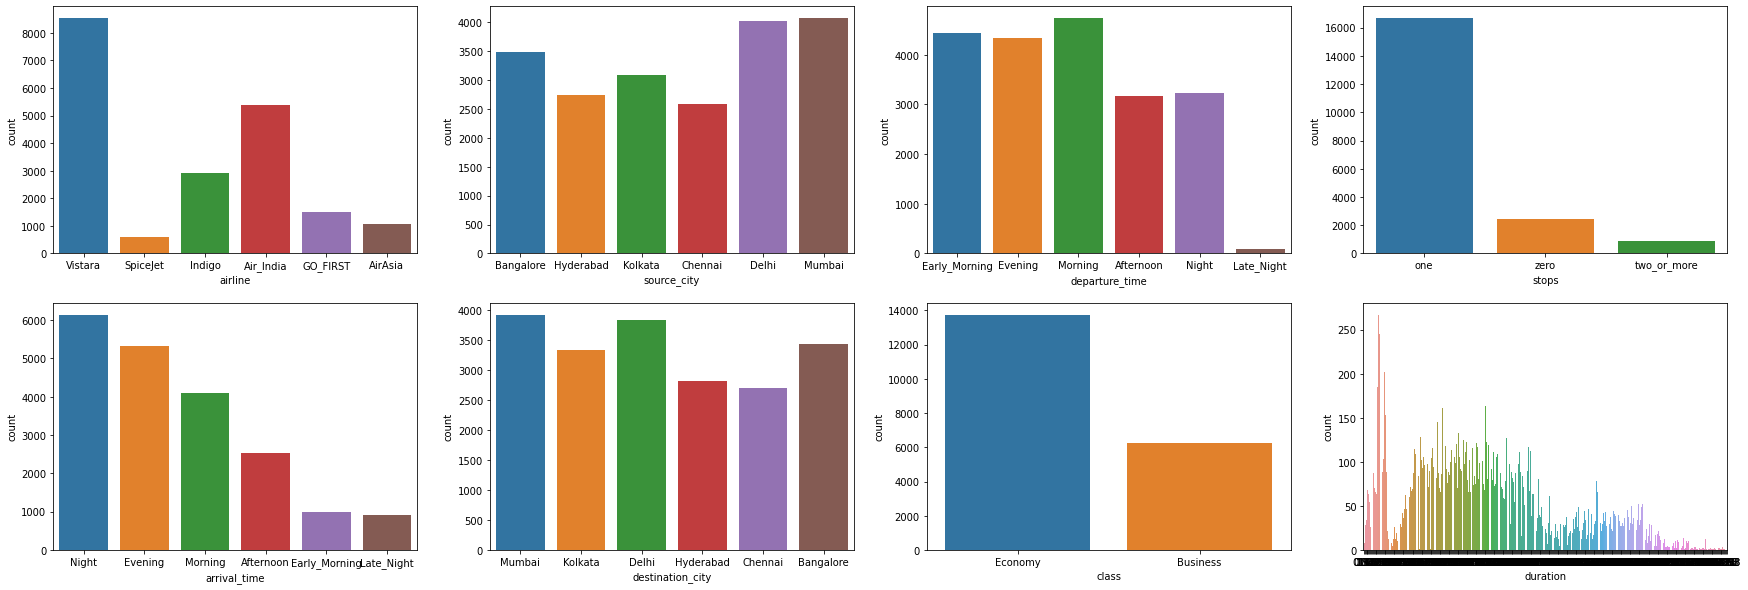

In [6]:
# Values counts

fig, ax = plt.subplots(2, 4, figsize=(30, 10))  

for i in range(2):
    for j in range(4):
        sns.countplot(ax=ax[i, j], data=df, x=df.columns[i*4+j])

In [7]:
# Split

X = df.drop('price', axis=1)
y = df.price.copy()

# Processing

In [8]:
# categories
num_attribs = ['duration','days_left']
cat_attribs = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

# numerical pipline
num_pip = Pipeline([
    ('std_scaler', StandardScaler())
])

# full pipline
ful_pip = ColumnTransformer([
    ('num', num_pip, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

X_prepared = ful_pip.fit_transform(X)

# Model

In [9]:
model = RandomForestRegressor()    # Random Forest Model

predict = cross_val_predict(model, X_prepared, y, cv=3)

In [10]:
# Evaluation

print("MAE =", round(mean_absolute_error(y, predict)))           # mean absolute error
print("RMSE =", round(mean_squared_error(y, predict)**(1/2)))    # mean squared error

MAE = 2096
RMSE = 3987


# Test data

In [11]:
test = pd.read_csv('/kaggle/input/aviachipta-narxini-bashorat-qilish/test_data.csv', index_col='id')
test.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
id,,,,,,,,,,
1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


In [12]:
test.drop('flight', axis=1, inplace=True)  # delete flight column

In [13]:
model.fit(X_prepared, y)    # fitting

RandomForestRegressor()

In [14]:
# model prediction

predicted = model.predict(ful_pip.fit_transform(test))

# Submission

In [15]:
solution = pd.read_csv('/kaggle/input/aviachipta-narxini-bashorat-qilish/sample_solution.csv', index_col='id')
solution.price = predicted
solution.to_csv("submission.csv")
pd.read_csv("./submission.csv")

,id,price
0,1,51791.72
1,2,54800.30
2,3,22839.50
3,4,2746.34
4,5,5747.16
...,...,...
4995,4996,59419.31
4996,4997,4456.23
4997,4998,50233.91
4998,4999,48698.30
